# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 


Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
data.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [4]:
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [5]:
data.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [6]:
data.set_index('ID',inplace=True)

In [7]:
data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0


In [8]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [10]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [12]:
data.isnull().sum(axis=1).value_counts()

0    3999
dtype: int64

In [13]:
data.isnull().sum(axis=0).value_counts()

0    11
dtype: int64

In [14]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(data)

In [15]:
scaled_Univ_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [16]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(scaled_Univ_df)

KMeans(n_clusters=5, random_state=0)

In [19]:
data["Cluster"] = kmeans.predict(scaled_Univ_df)

In [20]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


Elbow Curve

In [21]:
kmeans.inertia_ #Within a cluster sum 0f square

24541.32958204578

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[43988.99999999999,
 35409.51145242438,
 30899.246824652186,
 27446.37245668137,
 24541.32958204578,
 21089.973628929638,
 19165.861458655665,
 17316.866446128293,
 16043.406242309513,
 14726.9833227668]

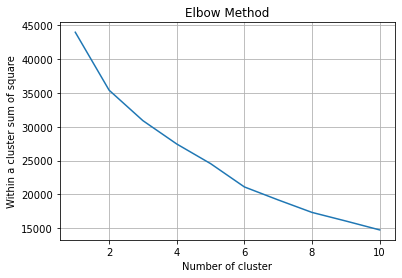

In [24]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within a cluster sum of square")
plt.grid()

In [25]:
# selecting 6 clusters from above scree plot
model=KMeans(n_clusters=6)
model.fit(scaled_Univ_df)
model.labels_

array([1, 1, 1, ..., 0, 3, 3])

In [26]:
# Assign clusters to the data set
airline2 = data.copy()
airline2['clusters4id'] = model.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster,clusters4id
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,3
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,0


In [27]:
# Compute the centroids for K=6 clusters with 11 variables
model.cluster_centers_

array([[ 4.68611309e-01,  8.63162139e-03,  1.32065101e+00,
        -9.82418871e-02, -5.34866496e-02,  1.05831804e+00,
         7.92310097e-01, -7.02361025e-02, -8.01136848e-02,
         3.17404803e-01,  6.64284488e-01],
       [-1.35624809e-01, -3.87769772e-02, -5.03071686e-01,
        -9.82418871e-02, -5.85712306e-02, -4.57412577e-01,
        -3.57526390e-01, -1.44774811e-01, -1.50545226e-01,
         7.82141063e-01, -1.54656954e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [-3.66820349e-01, -5.80614067e-02, -5.77572007e-01,
        -9.82418871e-02, -6.27665798e-02, -5.11590801e-01,
        -5.05553488e-01, -2.08656921e-01, -2.27814218e-01,
        -9.20949835e-01, -4.72701955e-01],
       [ 1.16905569e+00,  8.60551995e-01,  1.00129891e-01,
        -9.82418871e-02, -6.27665798e-02,  6.30018492e-01,
  

In [28]:
# Group data by Clusters (K=6)
airline2.groupby('clusters4id').agg(['mean']).reset_index()


,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,120928.983681,150.928377,3.878513,1.000000,1.001813,42726.199456,19.218495,362.050771,1.070716,4775.549411,0.690843,2.017226
1,1,59935.356265,114.117936,1.366912,1.000000,1.000819,6099.271089,8.168714,257.366093,0.802621,5733.583948,0.295659,0.266175
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.000000
3,3,36614.821843,99.132423,1.265529,1.000000,1.000000,4797.924232,6.749488,167.814334,0.509215,2217.461433,0.142662,0.079181
4,4,191398.960526,809.809211,2.197368,1.000000,1.000000,32358.500000,27.375000,5576.815789,16.230263,4694.269737,0.815789,1.131579
5,5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.232558


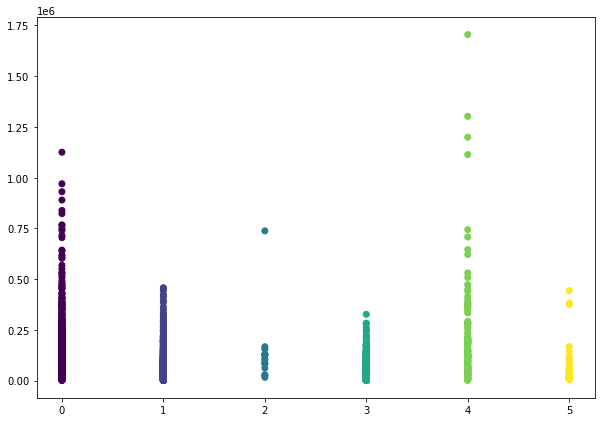

In [29]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clusters4id'],airline2['Balance'], c = model.labels_) 